In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
#example
#input: X22
#returns X

def get_class(exp):
    return exp[0]

In [4]:
#load data
data = pd.read_csv('flaringar_original_data.csv')
#the target data that has been modified
y = data['Flare Class'].apply(get_class)  #what we want to classify and predict
#dropping columns that are not needed
X = data.drop(['Flare Class', 'Flare Date', 'AR', 'SHRGT45'], axis=1)

X

,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,AREA_ACR,TOTFZ,MEANPOT,R_VALUE,EPSZ
0,3249.070,4.181500e+10,8.600000e+23,6.213300e+13,700.682,1.489950e+13,2.740000e+22,1103.97000,-552.8900,14038.00,4.820,-0.0251
1,3176.310,4.778200e+10,9.660000e+23,6.931420e+13,157.759,9.905710e+12,3.180000e+22,1400.93000,-869.7000,13463.60,4.825,-0.0345
2,1892.920,2.667300e+10,3.720000e+23,4.211730e+13,171.952,6.528880e+12,1.890000e+22,1370.85000,-231.2900,7496.19,4.438,-0.0164
3,1868.820,2.450900e+10,3.480000e+23,3.628930e+13,429.602,2.118070e+13,1.730000e+22,1198.60000,-317.5600,8669.42,4.319,-0.0246
4,5271.770,1.022900e+11,1.920000e+24,8.689800e+13,1066.250,1.611780e+13,6.440000e+22,1939.06000,-6162.1000,16094.80,4.912,-0.1143
...,...,...,...,...,...,...,...,...,...,...,...,...
840,191.660,2.753200e+09,1.600000e+22,3.697490e+12,14.317,1.201620e+12,1.850000e+21,196.69000,-89.5280,3684.01,3.219,-0.0617
841,453.274,4.039000e+09,2.450000e+22,9.979400e+12,140.312,6.265800e+12,4.280000e+21,159.16700,-742.7900,2668.60,3.011,-0.3488
842,330.547,4.944100e+09,6.020000e+22,6.738150e+12,83.429,1.788770e+12,3.830000e+21,195.09700,-389.4300,7298.23,3.302,-0.1494
843,26.477,1.021300e+09,7.490000e+20,3.684500e+11,12.193,2.752780e+11,1.860000e+20,9.81402,-9.2336,2420.74,2.946,-0.0172


Column meanings:<br>
total unsigned current helicity (TOTUSJH),<br>
total magnitude of Lorentz force (TOTBSQ),<br>
total photospheric magnetic free energy density (TOTPOT),<br>
total unsigned vertical current (TOTUSJZ),<br>
absolute value of the net current helicity (ABSNJZH),<br>
sum of the modulus of the net current per polarity (SAVNCPP),<br>
total unsigned flux (USFLUX),<br>
area of strong field pixels in the active region (AREA_ACR),<br>
sum of z-component of Lorentz force (TOTFZ),<br>
mean photospheric magnetic free energy (MEANPOT),<br>
sum of flux near the polarity inversion line (R_VALUE),<br>
sum of the z-component of normalized Lorentz force (EPSZ),<br>
and fraction of area with shear >45 degrees (SHRGT45)

In [5]:
from sklearn.model_selection import train_test_split  #splitting the dataset into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [6]:
X_train.shape # 633 train

(633, 12)

In [7]:
X_test.shape # 212 test

(212, 12)

# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [9]:
#Deriving the best D.T. hyperparameters with GridSearchCV

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(3, 10), 'max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, 
                   cv=10, return_train_score=True)
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=11, random_state=0)

In [10]:
tree = grid.best_estimator_
tree.fit(X_train, y_train)
print("accuracy: {:.2f}".format(tree.score(X_test, y_test)))

accuracy: 0.73


[Text(396.47368421052636, 391.392, 'R_VALUE <= 4.477\ngini = 0.516\nsamples = 633\nvalue = [89, 417, 108, 19]'),
 Text(193.83157894736843, 304.416, 'TOTUSJZ <= 14138499661824.0\ngini = 0.436\nsamples = 523\nvalue = [89, 379, 51, 4]'),
 Text(70.48421052631579, 217.44, 'TOTUSJZ <= 3965344940032.0\ngini = 0.549\nsamples = 167\nvalue = [70, 87, 10, 0]'),
 Text(35.242105263157896, 130.464, 'gini = 0.346\nsamples = 27\nvalue = [21, 6, 0, 0]'),
 Text(105.72631578947369, 130.464, 'MEANPOT <= 3384.2\ngini = 0.538\nsamples = 140\nvalue = [49, 81, 10, 0]'),
 Text(70.48421052631579, 43.488, 'gini = 0.346\nsamples = 54\nvalue = [12, 42, 0, 0]'),
 Text(140.96842105263158, 43.488, 'gini = 0.596\nsamples = 86\nvalue = [37, 39, 10, 0]'),
 Text(317.17894736842106, 217.44, 'SAVNCPP <= 16247850270720.0\ngini = 0.311\nsamples = 356\nvalue = [19, 292, 41, 4]'),
 Text(246.69473684210527, 130.464, 'TOTUSJZ <= 19381449916416.0\ngini = 0.266\nsamples = 320\nvalue = [19, 272, 28, 1]'),
 Text(211.45263157894738, 

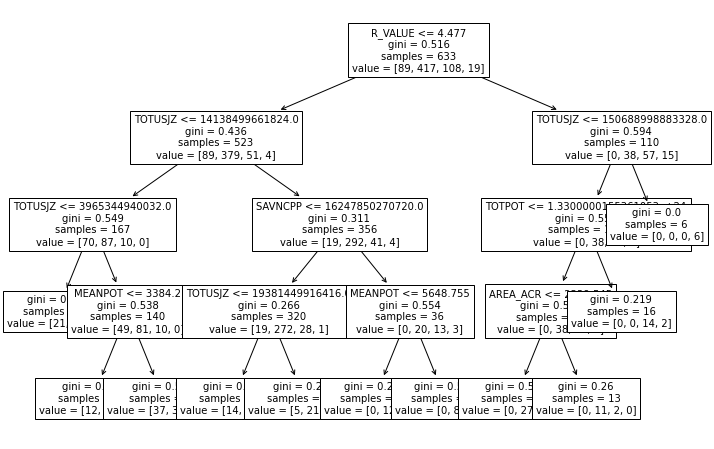

In [11]:
features_name = ["TOTUSJH", "TOTBSQ", "TOTPOT", "TOTUSJZ", "ABSNJZH", "SAVNCPP", "USFLUX", "AREA_ACR", "TOTFZ", "MEANPOT", "R_VALUE", "EPSZ"]
fig, ax = plt.subplots(figsize=(12,8))
plot_tree(grid.best_estimator_, feature_names=features_name, fontsize=10)

# Scale using StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
#normalizing the train and test data using a scaler
#fit in training set
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-0.95131962, -0.9069628 , -0.63436896, ..., -1.01233906,
        -1.13151466,  0.83649776],
       [-0.44948946, -0.57768198, -0.39599036, ..., -0.13039191,
         0.1666228 ,  1.02517475],
       [-0.82714298, -0.85851045, -0.59364487, ..., -0.39773016,
        -1.26936997,  0.9230672 ],
       ...,
       [-0.34286016, -0.53690636, -0.40809519, ..., -0.61757409,
         0.20970258, -0.54491371],
       [-0.44353159, -0.32012131, -0.33200772, ..., -0.23963354,
        -0.77538846,  1.28118351],
       [ 4.83241218,  3.93434952,  4.84021127, ...,  4.33795999,
         2.08941712,  1.55716985]])

In [15]:
X_test

array([[ 0.25454396,  0.10391308,  0.103766  , ...,  0.43865007,
         0.65773233,  0.24383006],
       [-0.86667886, -0.79174437, -0.59260731, ..., -0.07341043,
        -0.79549236,  0.31116185],
       [ 2.25551599,  2.80226408,  1.46815275, ...,  0.24861422,
         1.39583261, -0.18753731],
       ...,
       [-0.75315349, -0.74641922, -0.57687104, ..., -0.7976099 ,
        -0.16796351,  0.57234999],
       [-0.67157765, -0.72059252, -0.57012692, ..., -0.97965744,
        -0.95345156,  0.36369544],
       [-0.85971656, -0.70486982, -0.4426804 , ...,  1.35284325,
        -2.4942718 ,  1.6067438 ]])

# k-Nearest Neighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors':range(3, 31)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, 
                   cv=5, return_train_score=True)
grid.fit(X_train, y_train)
grid.best_params_

{'n_neighbors': 5}

In [17]:
grid.best_score_

0.7155980502437196

In [18]:
knn = grid.best_estimator_
knn.fit(X_train, y_train)
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))

accuracy: 0.71


# Support Vector Machine for classification

In [19]:
from sklearn.svm import SVC

In [20]:
model = SVC(kernel='linear', random_state=0)  
model.fit(X_train, y_train) 

SVC(kernel='linear', random_state=0)

In [21]:
pred = model.predict(X_test)  #predicting the test set results
pred

array(['C', 'C', 'M', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'M', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'M', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'M', 'C', 'M', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'M', 'C', 'B', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'M', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'X', 'C',
       'C', 'C', 'M', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'M', 'C

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
print('accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred))) #accuracy with linear kernal

accuracy score: 0.6698


In [24]:
from sklearn.pipeline import make_pipeline

In [25]:
scaled_svc = make_pipeline(StandardScaler(), SVC())

In [26]:
# using pipeline of scaler and SVC. Could also use SVC and rescale gamma
param_grid = {'svc__C': np.logspace(-3, 2, 6),
              'svc__gamma': np.logspace(-3, 2, 6) / X_train.shape[0]}
param_grid

{'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 'svc__gamma': array([1.57977883e-06, 1.57977883e-05, 1.57977883e-04, 1.57977883e-03,
        1.57977883e-02, 1.57977883e-01])}

In [27]:
grid = GridSearchCV(scaled_svc, param_grid=param_grid, cv=10)   # using gridsearchCV to find the best parameters. 
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'svc__gamma': array([1.57977883e-06, 1.57977883e-05, 1.57977883e-04, 1.57977883e-03,
       1.57977883e-02, 1.57977883e-01])})

In [28]:
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'svc__C': 100.0, 'svc__gamma': 0.01579778830963665}
0.7028301886792453


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           B       0.80      0.10      0.18        39
           C       0.67      0.97      0.79       135
           M       0.55      0.18      0.27        34
           X       1.00      0.25      0.40         4

    accuracy                           0.67       212
   macro avg       0.75      0.37      0.41       212
weighted avg       0.68      0.67      0.59       212

